In [1]:
import cv2
import os
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
# Path with the test images
image_path = '../assets'

In [3]:
!wget -nc -nv https://raw.githubusercontent.com/opencv/opencv/${OPENCV_VERSION}/data/haarcascades/haarcascade_frontalface_default.xml -P ../downloads
!wget -nc -nv https://raw.githubusercontent.com/opencv/opencv/${OPENCV_VERSION}/data/haarcascades/haarcascade_eye.xml -P ../downloads
!wget -nc -nv https://raw.githubusercontent.com/opencv/opencv/${OPENCV_VERSION}/data/haarcascades/haarcascade_smile.xml -P ../downloads

In [4]:
# Loading the cascades

# We load the cascade for the face.
face_cascade = cv2.CascadeClassifier('../downloads/haarcascade_frontalface_default.xml')
# We load the cascade for the eyes.
eye_cascade = cv2.CascadeClassifier('../downloads/haarcascade_eye.xml')
# We load the cascade for the smiles.
smile_cascade = cv2.CascadeClassifier('../downloads/haarcascade_smile.xml')

In [5]:
def imread(image_name):
    image = cv2.imread(os.path.join(image_path, image_name))
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [6]:
def imshow(image, title="", w = 10, h = 10):
    plt.figure(figsize=(w, h))
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

In [7]:
def detect(image, detect_eyes = True, detect_smiles = True):
    """A function that takes as input the image, 
    and return the same image with the detector rectangles."""
    
    # Face detection is performed on gray image
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # We apply the detectMultiScale method from the face cascade
    # to locate one or several faces in the image.
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x, y, w, h) in faces:
        # We paint a rectangle around the face.
        cv2.rectangle(image, (x, y), (x + w, y + w), (255, 0, 0), 2)
        # We get the region of interest in the black and white image.
        roi_gray = gray[y:y + h, x:x + w]
        # We get the region of interest in the colored image.
        roi_color = image[y:y + h, x:x + w]
        
        if detect_eyes:
            # We apply the detectMultiScale method to locate one or several eyes in the image.
            eyes = eye_cascade.detectMultiScale(roi_gray, 1.3, 3)
            for (ex, ey, ew, eh) in eyes:
                # We paint a rectangle around the eyes, but inside the referential of the face.
                cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + ew), (0, 255, 0), 2)
    
        if detect_smiles:
            # We apply the detectMultiScale method to locate one or several smiles in the image.
            smiles = smile_cascade.detectMultiScale(roi_gray, 1.7, 22)
            for (sx, sy, sw, sh) in smiles:
                cv2.rectangle(roi_color, (sx, sy), (sx+sw, sy+sh), (0, 0, 255), 2)
            
    return image

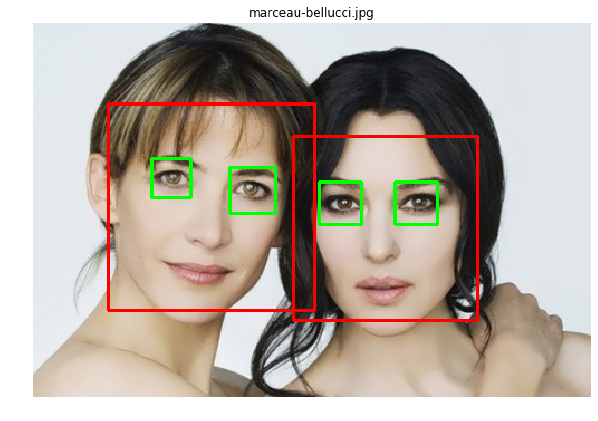

In [8]:
image_name = 'marceau-bellucci.jpg'
image = imread(image_name)

# Detect faces and eyes
image = detect(image)

imshow(image, image_name)

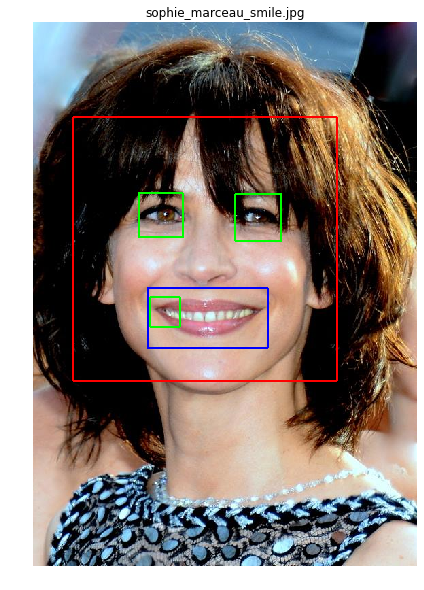

In [9]:
image_name = 'sophie_marceau_smile.jpg'
image = imread(image_name)

# Detect faces and eyes
image = detect(image)

imshow(image, image_name)

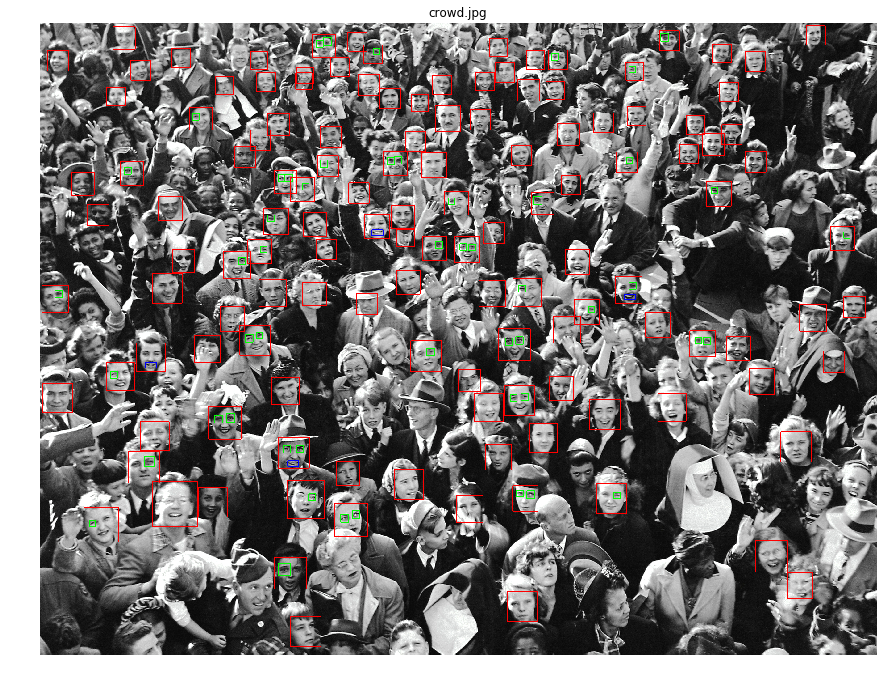

In [10]:
# Image source: https://towardsdatascience.com/being-better-at-machine-learning-than-google-is-it-possible-62c5e4643ddb
image_name = 'crowd.jpg'
image = imread(image_name)

# Detect faces and eyes
image = detect(image)

imshow(image, image_name, 15, 15)

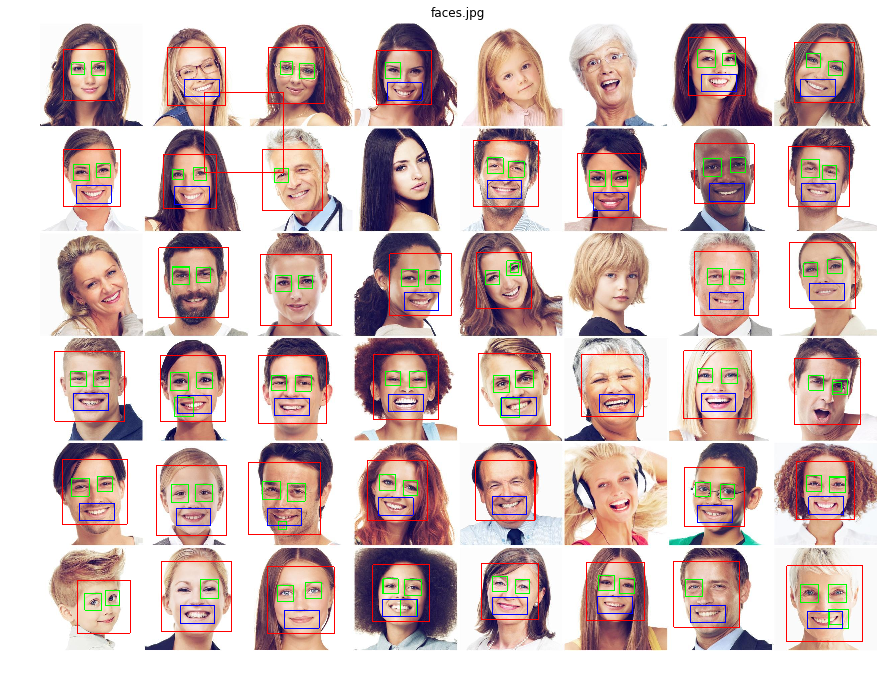

In [11]:
# Image source: https://www.independent.co.uk/life-style/health-and-families/health-news/faces-reveal-a-lot-but-the-science-needs-to-be-interpreted-with-care-a7985131.html
image_name = 'faces.jpg'
image = imread(image_name)

# Detect faces and eyes
image = detect(image)

imshow(image, image_name, 15, 15)